In [1]:
import pandas as pd

data={
    "month" : ['jan','feb','mar','apr','may','jun'],
    "sales" : [10000,15000,12000,13000,17000,18000],
    "profit" : [2000,4000,3000,2500,6000,7000]
}
df= pd.DataFrame(data)
print(df)

  month  sales  profit
0   jan  10000    2000
1   feb  15000    4000
2   mar  12000    3000
3   apr  13000    2500
4   may  17000    6000
5   jun  18000    7000


In [6]:
df[['month','sales']]

,month,sales
0,jan,10000
1,feb,15000
2,mar,12000
3,apr,13000
4,may,17000
5,jun,18000


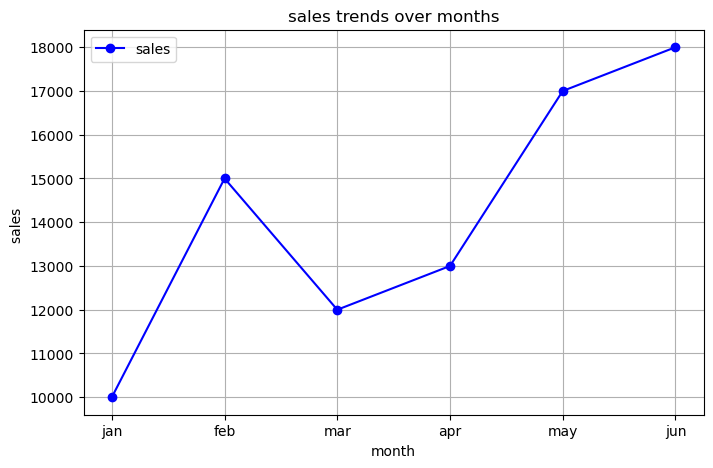

In [7]:
import matplotlib.pyplot as plt
#line chart
plt.figure(figsize=(8,5))
plt.plot(df['month'],df['sales'],color='blue',marker='o',linestyle='-',label='sales') 
plt.title('sales trends over months')
plt.xlabel('month')
plt.ylabel('sales ')
plt.grid(True)
plt.legend()
plt.show()

<BarContainer object of 6 artists>

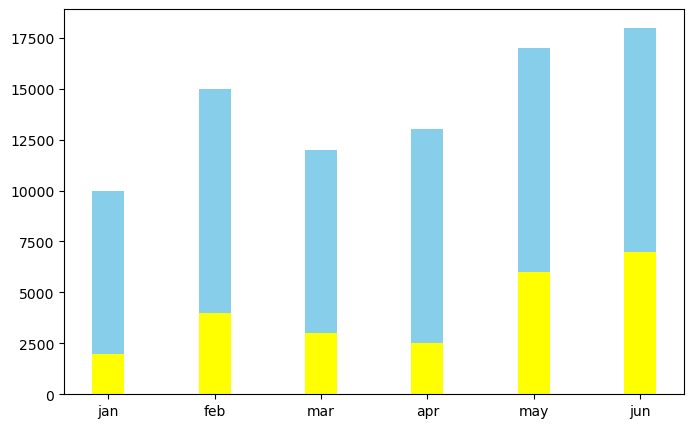

In [8]:
# bar chart
plt.figure(figsize=(8,5))
width = 0.3
plt.bar(df['month'],df['sales'],width=width,color='skyblue',label='sales')
plt.bar(df['month'],df['profit'],width=width,color='yellow',label='profit')

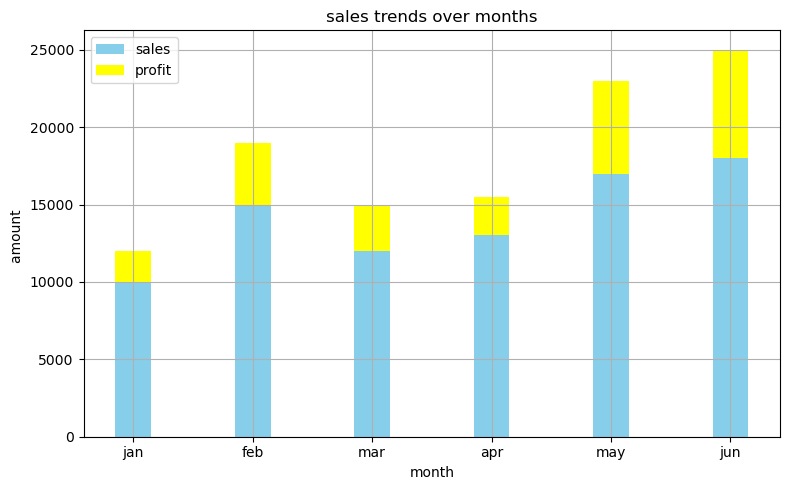

In [10]:
plt.figure(figsize=(8,5))
width = 0.3
plt.bar(df['month'],df['sales'],width=width,color='skyblue',label='sales')
plt.bar(df['month'],df['profit'],width=width,color='yellow',label='profit',bottom=df['sales'])
plt.title('sales trends over months')
plt.xlabel('month')
plt.ylabel('amount ')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'profit by month')

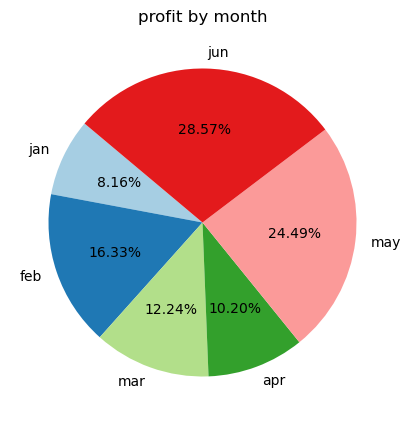

In [18]:
#pie chart

from enum import auto
plt.figure(figsize=(8,5))
plt.pie(df['profit'],labels=df['month'],autopct='%1.2f%%',startangle=140,colors=plt.cm.Paired.colors)
plt.title('profit by month')

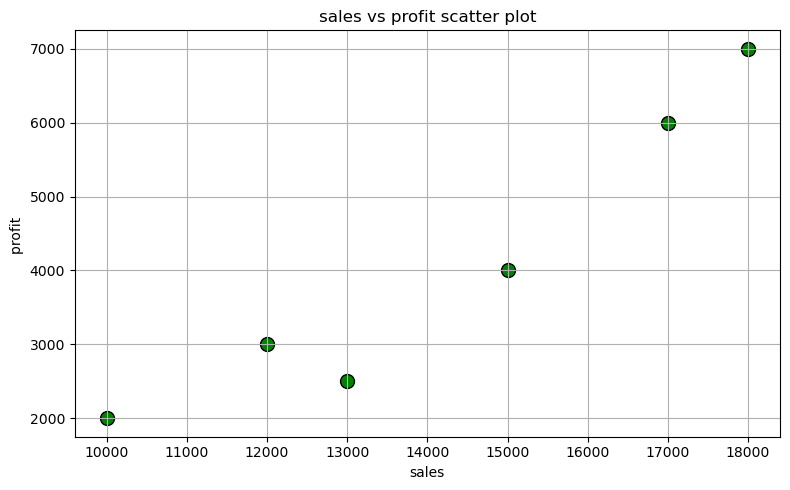

In [36]:
#scatter plot

plt.figure(figsize=(8,5))
plt.scatter(df['sales'],df['profit'],color='green',s=100,edgecolors='black') 
plt.title('sales vs profit scatter plot')
plt.xlabel('sales')
plt.ylabel('profit ')
plt.tight_layout()
plt.grid(True)
plt.show()

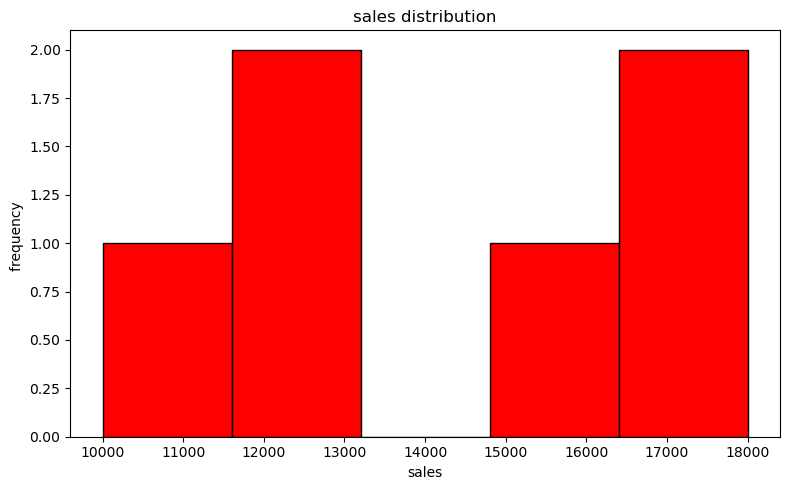

In [23]:
#histogram
plt.figure(figsize=(8,5))
plt.hist(df['sales'],bins=5,color='red',edgecolor='black')
plt.title('sales distribution')
plt.xlabel('sales')
plt.ylabel('frequency ')
plt.tight_layout()
plt.show()

In [45]:
# #box plot

# plt.figure(figsize=(8,5))
# plt.boxplot(df['profit']),
# plt.title('sales box plot')
# plt.ylabel('sales ')
# plt.tight_layout()
# plt.show()?

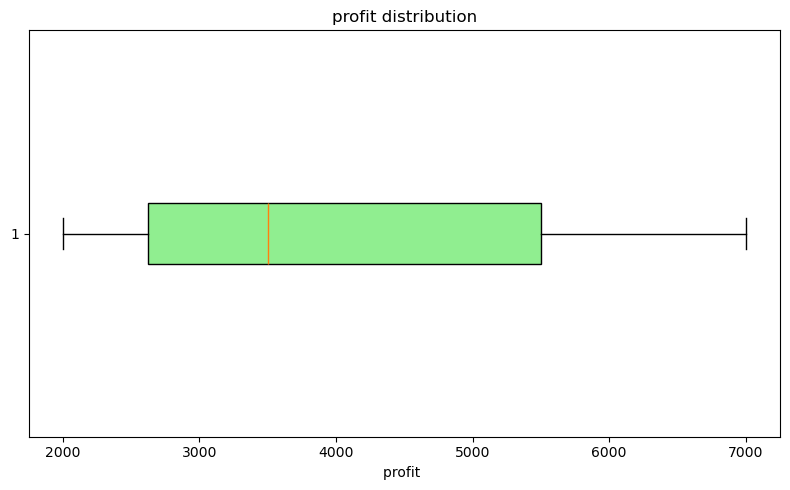

In [48]:
plt.figure(figsize=(8,5))
plt.boxplot(df['profit'],vert=False,patch_artist=True,boxprops=dict(facecolor='lightgreen'))
plt.title('profit distribution')
plt.xlabel('profit ')
plt.tight_layout()
plt.show()

In [35]:
#! pip install gradio

In [49]:
import gradio as gr
import pandas as pd
import matplotlib.pyplot as plt

data={
    "month" : ['jan','feb','mar','apr','may','jun'],
    "sales" : [10000,15000,12000,13000,17000,18000],
    "profit" : [2000,4000,3000,2500,6000,7000]
}
df= pd.DataFrame(data)

def generate_plot(plot_type):
    fig = plt.figure(figsize=(8,5))

    if plot_type == 'line plot':
        plt.plot(df['month'],df['sales'],color='blue',marker='o',linestyle='-',label='sales')
        plt.title('sales trends over months')
        plt.xlabel('month')
        plt.ylabel('sales ')
        plt.grid(True)
        plt.legend()
        
    elif plot_type == 'stacked bar chart':
        fig.set_size_inches(10,6)
        width = 0.3
        plt.bar(df['month'],df['sales'],width=width,color='skyblue',label='sales')
        plt.bar(df['month'],df['profit'],width=width,color='yellow',label='profit',bottom=df['sales'])
        plt.title('sales trends over months')
        plt.xlabel('month')
        plt.ylabel('amount ')
        plt.grid(True)
        plt.legend()

    elif plot_type == 'pie chart':
        plt.set_size_inches(107,7)
        plt.pie(df['profit'],labels=df['month'],autopct='%1.2f%%',startangle=140,colors=plt.cm.Paired.colors)
        plt.title('profit by month')

    elif plot_type == 'scatter plot':
        plt.scatter(df['sales'],df['profit'],color='green',s=100,edgecolors='black') 
        plt.title('sales vs profit scatter plot')
        plt.xlabel('sales')
        plt.ylabel('profit ')
        plt.grid(True)

    elif plot_type == 'histogram':
        plt.hist(df['sales'],bins=5,color='red',edgecolor='black')
        plt.title('sales distribution')
        plt.xlabel('sales')
        plt.ylabel('frequency ')
        
    elif plot_type == 'box plot':
        plt.boxplot(df['profit'],vert=False,patch_artist=True,boxprops=dict(facecolor='lightgreen'))
        plt.title('profit distribution')
        plt.xlabel('profit ')
        
    plt.tight_layout()
    return fig

#gradio ui

demo = gr.Interface(
    fn=generate_plot,
    inputs=gr.Radio(
        ['line plot','stacked bar chart',' pie chart','scatter plot','histogram','boxplot'],
        label="choose plot type"
    ),
    outputs=gr.Plot(label="sales data visualization"),
    title= 'sales and profit visual insight',
    description='choose the type to visualize the data'
)

demo.launch()
        

* Running on local URL:  http://127.0.0.1:7866
* To create a public link, set `share=True` in `launch()`.
